In [1]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1QTi7dJtNAfFR5mG0rd8K3ZGvEIfSn_DS
!unzip PersianData.zip

Downloading...
From: https://drive.google.com/uc?id=1QTi7dJtNAfFR5mG0rd8K3ZGvEIfSn_DS
To: /content/PersianData.zip
100% 7.46k/7.46k [00:00<00:00, 18.3MB/s]
Archive:  PersianData.zip
  inflating: 1.jpg                   
  inflating: 2.jpg                   
  inflating: 3.jpg                   
  inflating: 4.jpg                   
  inflating: 5.jpg                   


In [35]:
from PIL import Image, ImageDraw

def convertImageToBinary(path):
    image = Image.open(path)
    draw = ImageDraw.Draw(image)
    width, height = image.size
    pix = image.load()
    factor = 1000
    binary_representation = []

    for i in range(width):
        for j in range(height):
            red, green, blue = pix[i, j]
            total_intensity = red + green + blue

            if total_intensity > (((255 + factor) // 2) * 3):
                red, green, blue = 255, 255, 255
                binary_representation.append(-1)
            else:
                red, green, blue = 0, 0, 0
                binary_representation.append(1)

            draw.point((i, j), (red, green, blue))

    del draw
    return binary_representation

In [36]:
from PIL import Image, ImageDraw
import random

def generateNoisyImages():
    image_paths = [
        "/content/1.jpg",
        "/content/2.jpg",
        "/content/3.jpg",
        "/content/4.jpg",
        "/content/5.jpg"
    ]

    for i, image_path in enumerate(image_paths, start=1):
        noisy_image_path = f"/content/noisy{i}.jpg"
        getNoisyBinaryImage(image_path, noisy_image_path)
        print(f"Noisy image for {image_path} generated and saved as {noisy_image_path}")

def getNoisyBinaryImage(input_path, output_path):
    image = Image.open(input_path)
    draw = ImageDraw.Draw(image)
    width, height = image.size
    pix = image.load()
    noise_factor = 1000

    for i in range(width):
        for j in range(height):
            rand = random.randint(-noise_factor, noise_factor)
            red = pix[i, j][0] + rand
            green = pix[i, j][1] + rand
            blue = pix[i, j][2] + rand

            if red < 0: red = 0
            if green < 0: green = 0
            if blue < 0: blue = 0
            if red > 255: red = 255
            if green > 255: green = 255
            if blue > 255: blue = 255

            draw.point((i, j), (red, green, blue))

    image.save(output_path, "JPEG")
    del draw

generateNoisyImages()

Noisy image for /content/1.jpg generated and saved as /content/noisy1.jpg
Noisy image for /content/2.jpg generated and saved as /content/noisy2.jpg
Noisy image for /content/3.jpg generated and saved as /content/noisy3.jpg
Noisy image for /content/4.jpg generated and saved as /content/noisy4.jpg
Noisy image for /content/5.jpg generated and saved as /content/noisy5.jpg


In [21]:
from google.colab import files

for i in range(1, 6):  # For noisy1.jpg to noisy5.jpg
    files.download(f'/content/noisy{i}.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [37]:
from PIL import Image, ImageDraw

def convertImageToBinary(path):
    image = Image.open(path)
    draw = ImageDraw.Draw(image)
    width, height = image.size
    pix = image.load()
    factor = 1000
    binary_representation = []

    for i in range(width):
        for j in range(height):
            red, green, blue = pix[i, j]
            total_intensity = red + green + blue

            if total_intensity > (((255 + factor) // 2) * 3):
                red, green, blue = 255, 255, 255
                binary_representation.append(-1)
            else:
                red, green, blue = 0, 0, 0
                binary_representation.append(1)

            draw.point((i, j), (red, green, blue))

    del draw
    return binary_representation

In [38]:
from PIL import Image, ImageDraw
import random

def generateNoisyImages():
    image_paths = [
        "/content/1.jpg",
        "/content/2.jpg",
        "/content/3.jpg",
        "/content/4.jpg",
        "/content/5.jpg"
    ]

    for i, image_path in enumerate(image_paths, start=1):
        noisy_image_path = f"/content/noisy{i}.jpg"
        getNoisyBinaryImage(image_path, noisy_image_path)
        print(f"Noisy image for {image_path} generated and saved as {noisy_image_path}")

def getNoisyBinaryImage(input_path, output_path):
    image = Image.open(input_path)
    draw = ImageDraw.Draw(image)
    width, height = image.size
    pix = image.load()
    noise_factor = 1000

    for i in range(width):
        for j in range(height):
            rand = random.randint(-noise_factor, noise_factor)
            red = pix[i, j][0] + rand
            green = pix[i, j][1] + rand
            blue = pix[i, j][2] + rand

            if red < 0: red = 0
            if green < 0: green = 0
            if blue < 0: blue = 0
            if red > 255: red = 255
            if green > 255: green = 255
            if blue > 255: blue = 255

            draw.point((i, j), (red, green, blue))

    image.save(output_path, "JPEG")
    del draw

generateNoisyImages()

Noisy image for /content/1.jpg generated and saved as /content/noisy1.jpg
Noisy image for /content/2.jpg generated and saved as /content/noisy2.jpg
Noisy image for /content/3.jpg generated and saved as /content/noisy3.jpg
Noisy image for /content/4.jpg generated and saved as /content/noisy4.jpg
Noisy image for /content/5.jpg generated and saved as /content/noisy5.jpg


In [39]:
from PIL import Image
import numpy as np

def convertImageToBinary(path):
    image = Image.open(path).convert('RGB')
    pixels = np.array(image)
    total_intensity = np.sum(pixels, axis=2)
    threshold = ((255 + 100) // 2) * 3
    binary_representation = np.where(total_intensity > threshold, -1, 1)
    return binary_representation.flatten().tolist()

In [40]:
from PIL import Image
import numpy as np
import random

def generateNoisyImages():
    image_paths = [
        "/content/1.jpg",
        "/content/2.jpg",
        "/content/3.jpg",
        "/content/4.jpg",
        "/content/5.jpg"
    ]

    for i, image_path in enumerate(image_paths, start=1):
        noisy_image_path = f"/content/noisy{i}.jpg"
        getNoisyBinaryImage(image_path, noisy_image_path)
        print(f"Noisy image for {image_path} generated and saved as {noisy_image_path}")

def getNoisyBinaryImage(input_path, output_path):
    image = Image.open(input_path).convert('RGB')
    pixels = np.array(image)
    noise_factor = 1000
    noise = np.random.randint(-noise_factor, noise_factor + 1, pixels.shape).astype(np.int32)
    noisy_pixels = np.clip(pixels + noise, 0, 255).astype(np.uint8)
    noisy_image = Image.fromarray(noisy_pixels)
    noisy_image.save(output_path, "JPEG")

generateNoisyImages()

Noisy image for /content/1.jpg generated and saved as /content/noisy1.jpg
Noisy image for /content/2.jpg generated and saved as /content/noisy2.jpg
Noisy image for /content/3.jpg generated and saved as /content/noisy3.jpg
Noisy image for /content/4.jpg generated and saved as /content/noisy4.jpg
Noisy image for /content/5.jpg generated and saved as /content/noisy5.jpg


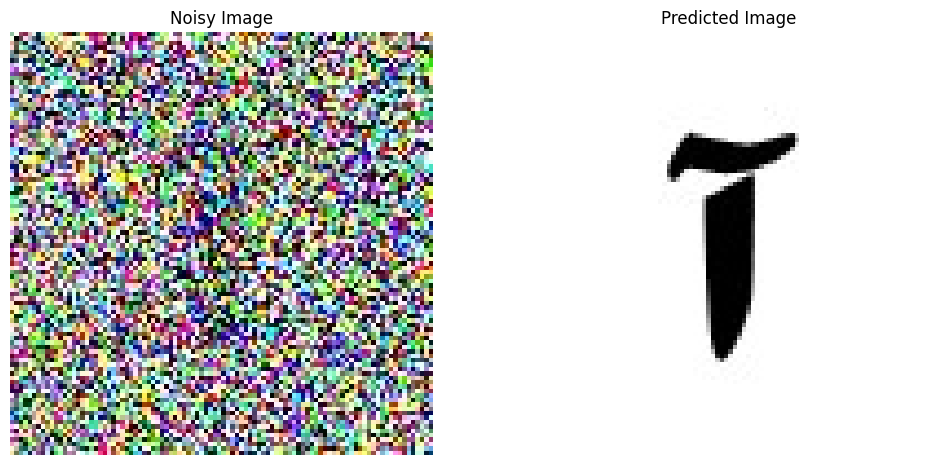

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def hamming_distance(image1, image2):
    """Calculate the Hamming distance between two binary images."""
    return np.sum(image1 != image2)

def hamming_neural_network(noisy_image, original_images):
    """Predict the original image from a noisy image using Hamming distance."""
    min_distance = float('inf')
    predicted_image = None

    for original in original_images:
        distance = hamming_distance(noisy_image.flatten(), original.flatten())  # Flatten for comparison
        if distance < min_distance:
            min_distance = distance
            predicted_image = original

    return predicted_image

def plot_images(noisy_image, predicted_image):
    """Plot the noisy and predicted images side by side."""
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title("Noisy Image")
    plt.imshow(noisy_image)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Predicted Image")
    plt.imshow(predicted_image)
    plt.axis('off')

    plt.show()

# Step 1: Set paths for original images and generated noisy images
original_image_paths = [
    "/content/1.jpg",
    "/content/2.jpg",
    "/content/3.jpg",
    "/content/4.jpg",
    "/content/5.jpg"
]

# Assuming noisy images have been saved as follows
noisy_image_paths = [
    "/content/noisy1.jpg",
    "/content/noisy2.jpg",
    "/content/noisy3.jpg",
    "/content/noisy4.jpg",
    "/content/noisy5.jpg"
]

# Load original images for prediction
original_images = [np.array(Image.open(path).convert('RGB')) for path in original_image_paths]

# Load noisy images for testing
noisy_images = [np.array(Image.open(path).convert('RGB')) for path in noisy_image_paths]

# Step 2: Use the first noisy image for prediction
noisy_image = noisy_images[0]
predicted_image = hamming_neural_network(noisy_image, original_images)

# Step 3: Plot the noisy image and its predicted original image
plot_images(noisy_image, predicted_image)

## Hopf

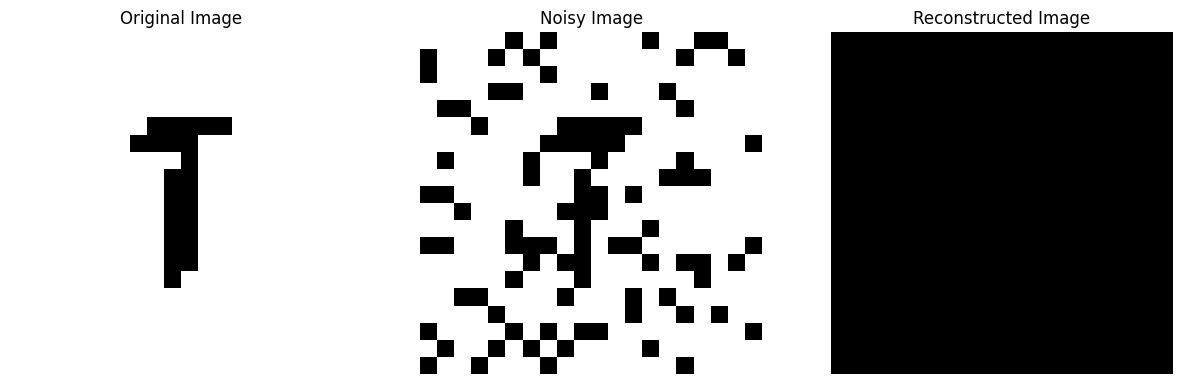

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Class implementation for the Hopfield Network
class HopfieldNetwork:
    def __init__(self, n_units):
        self.weights = np.zeros((n_units, n_units))

    def train(self, patterns):
        """Train the Hopfield network with binary patterns."""
        for pattern in patterns:
            # Make sure the pattern is bipolar: -1 for 0, +1 for 1
            bipolar_pattern = np.where(pattern == 0, -1, 1)
            self.weights += np.outer(bipolar_pattern, bipolar_pattern)
        # Set the diagonal to zero to avoid self-connections
        np.fill_diagonal(self.weights, 0)

    def predict(self, input_pattern, max_iterations=5):
        """Predict the output based on an input pattern."""
        current_pattern = np.where(input_pattern == 0, -1, 1)  # Convert to bipolar
        for _ in range(max_iterations):
            for i in range(len(current_pattern)):
                # Calculate the net input
                net_input = np.dot(self.weights[i], current_pattern)
                # Update the state based on the net input
                current_pattern[i] = 1 if net_input > 0 else 0
        return np.where(current_pattern == -1, 0, 1)  # Convert back to binary

def load_and_binarize_images(image_paths, size=(20, 20)):
    """Load and binarize images to a specified size."""
    images = []
    for path in image_paths:
        img = Image.open(path).convert('L').resize(size)  # Convert to grayscale and resize
        img_array = np.array(img)
        # Binarize the image: 0 for Dark, 1 for Light
        binarized_image = np.where(img_array > 128, 1, 0)  # Threshold at 128
        images.append(binarized_image.flatten())  # Flatten for the Hopfield network
    return images

def add_noise(image, noise_level=0.1):
    """Add noise to a binary image."""
    noisy_image = image.copy()
    num_flips = int(noise_level * noisy_image.size)  # Total pixels to flip
    indices = np.random.choice(np.arange(noisy_image.size), num_flips, replace=False)
    noisy_image.ravel()[indices] = 1 - noisy_image.ravel()[indices]  # Flip 0 to 1 and 1 to 0
    return noisy_image

def plot_images(original_image, noisy_image, reconstructed_image):
    """Plot the original, noisy, and reconstructed images side by side."""
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(original_image.reshape(20, 20), cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title("Noisy Image")
    plt.imshow(noisy_image.reshape(20, 20), cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title("Reconstructed Image")
    plt.imshow(reconstructed_image.reshape(20, 20), cmap='gray')
    plt.axis('off')

    plt.show()

# Set paths for original images (modify as needed)
original_image_paths = [
    "/content/1.jpg",
    "/content/2.jpg",
    "/content/3.jpg",
    "/content/4.jpg",
    "/content/5.jpg"
]

# Load and binarize original images
original_patterns = load_and_binarize_images(original_image_paths)

# Train the Hopfield network with original patterns
hopfield_network = HopfieldNetwork(n_units=len(original_patterns[0]))
hopfield_network.train(original_patterns)

# Create a noisy version of one of the original images
noisy_image = add_noise(original_patterns[0], noise_level=0.2)  # Change noise level as needed

# Predict/reconstruct the image from the noisy input
reconstructed_image = hopfield_network.predict(noisy_image)

# Plot images
plot_images(original_patterns[0], noisy_image, reconstructed_image)

Image with missing points for /content/1.jpg generated and saved as /content/missing_points1.jpg
Image with missing points for /content/2.jpg generated and saved as /content/missing_points2.jpg
Image with missing points for /content/3.jpg generated and saved as /content/missing_points3.jpg
Image with missing points for /content/4.jpg generated and saved as /content/missing_points4.jpg
Image with missing points for /content/5.jpg generated and saved as /content/missing_points5.jpg


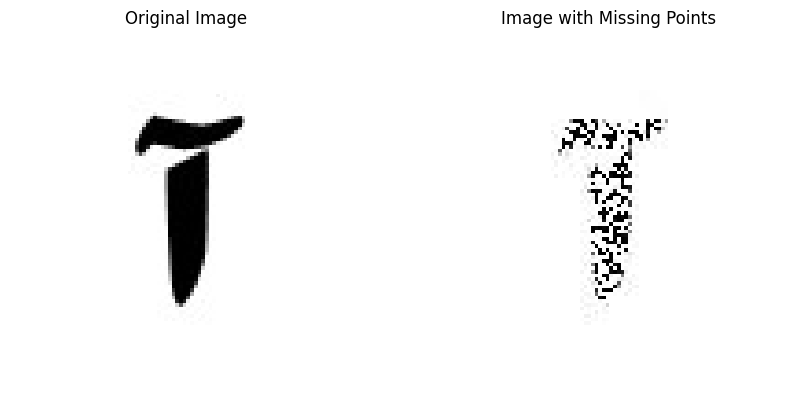

In [34]:
from PIL import Image, ImageDraw
import random
import matplotlib.pyplot as plt

def generateImagesWithMissingPoints():
    # List of image file paths
    image_paths = [
        "/content/1.jpg",
        "/content/2.jpg",
        "/content/3.jpg",
        "/content/4.jpg",
        "/content/5.jpg"
    ]

    for i, image_path in enumerate(image_paths, start=1):
        output_path = f"/content/missing_points{i}.jpg"
        createImageWithMissingPoints(image_path, output_path)
        print(f"Image with missing points for {image_path} generated and saved as {output_path}")

    # Plot one of the images with missing points
    plotImageWithMissingPoints(image_paths[0], f"/content/missing_points1.jpg")

def createImageWithMissingPoints(input_path, output_path):
    """
    Create an image with random missing points and save it as a new file.

    Args:
        input_path (str): The file path to the input image.
        output_path (str): The file path to save the modified image.
    """
    # Open the input image
    image = Image.open(input_path)

    # Create a drawing tool for manipulating the image
    draw = ImageDraw.Draw(image)

    # Determine the image's width and height in pixels
    width, height = image.size

    # Define the number of points to remove (as a percentage of total pixels)
    missing_points_count = int(0.99 * width * height)  # Remove 5% of pixels

    for _ in range(missing_points_count):
        # Randomly select a pixel to remove
        x = random.randint(0, width - 1)
        y = random.randint(0, height - 1)

        # Set the pixel to white (255, 255, 255)
        draw.point((x, y), (255, 255, 255))

    # Save the modified image as a file
    image.save(output_path, "JPEG")

    # Clean up the drawing tool
    del draw

def plotImageWithMissingPoints(original_path, modified_path):
    """
    Plot the original and modified images side by side for comparison.

    Args:
        original_path (str): The file path to the original image.
        modified_path (str): The file path to the modified image.
    """
    original_image = Image.open(original_path)
    modified_image = Image.open(modified_path)

    # Plot the images
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(original_image)
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title("Image with Missing Points")
    plt.imshow(modified_image)
    plt.axis("off")

    plt.show()

# Generate images with missing points and plot one of them
generateImagesWithMissingPoints()
